In [16]:
import numpy as np
from prep import *
from ocr import box_image_text
import matplotlib.pyplot as plt

import pytesseract
pytesseract.pytesseract.tesseract_cmd = '/opt/homebrew/bin/tesseract'


In [26]:
# IMAGE LOADING
sample = get_internaldata()[2].copy()
preview(sample, 'reference image')

# # IDENTIFY TEXT WITH REF MEASUREMENT
cropped = sample[900:, 950:]
box_image_text(cropped, 'scale text')
pytesseract.image_to_string(cropped)

# Hough Circle Transform 

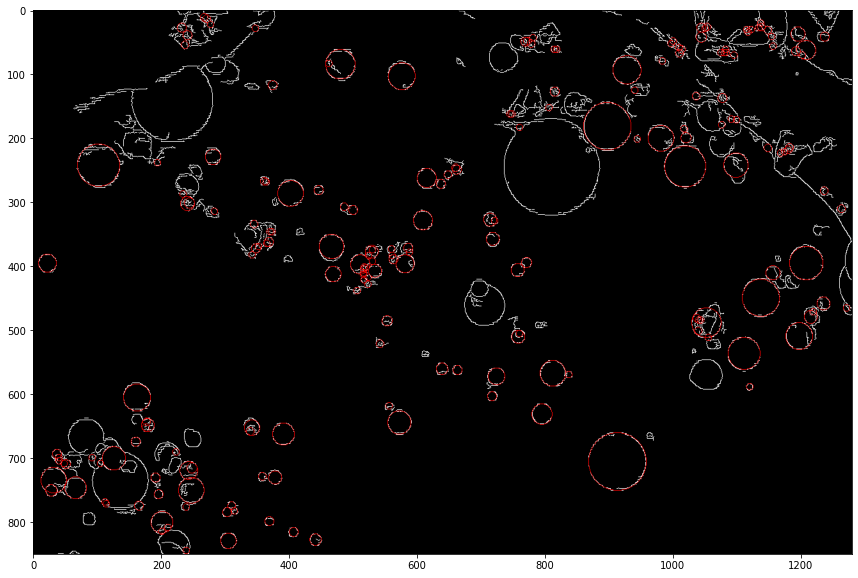

In [31]:
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import peak_local_max, canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage import color


n_circles = 200 #FIXME: must be tuned to image
base_image2 = cv.Canny(sample,30,150)[:850, :]

# Detect wide range of radii
hough_radii = np.arange(5, 300)
hough_res = hough_circle(base_image2, hough_radii)

# Select the most prominent n circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                        min_xdistance=2, min_ydistance=2, total_num_peaks=n_circles)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 10))
base_image2 = color.gray2rgb(base_image2)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,shape=base_image2.shape)
    base_image2[circy, circx] = (250, 0 ,0)

ax.imshow(base_image2, cmap=plt.cm.gray)

# Scale Recognition (working)

Use Probablistic Hough Line Transform to find (x,y) of first and last line

In [32]:
# scale_img = base_image[905:, 700:].copy()
# # scale_img = cv.cvtColor(scale_img, cv.COLOR_RGB2GRAY)
# scale_edged_img = cv.Canny(cv.GaussianBlur(scale_img, (5,5), 0), 30, 50)
# # scale_edged_img = cv.Canny(scale_img, 30, 150)

# lines = cv.HoughLinesP(image=scale_edged_img,rho=1,
#                         theta=np.pi/180, threshold=30,
#                         lines=np.array([]))

# lines_list = []
# for points in lines:
#     # Extracted points nested in the list
#     x1,y1,x2,y2 = points[0]
#     # Draw the lines joining the points
#     cv.line(scale_img,(x1,y1),(x2,y2),(0,0,255),2)
#     # Maintain a simples lookup list for points
#     lines_list.append([(x1,y1),(x2,y2)])

# preview(scale_img, 'houghlinesp')